# Unraveling Patterns in Insurance Charges

Team Members: Dhanavikram Sekar, Hariharan Kumar, Indu Varshini Jayapal, Naveen Vinayaga Murthy, Nidhi Choudhary

## What are the factors influencing the variability in insurance costs in the United States?


In [ ]:
#import all the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import scipy.stats
from scipy.stats import shapiro
from scipy.stats import boxcox


import warnings
warnings.filterwarnings('ignore')

#Setting style and colors for seaborn plots
sns.set_style('white', {'font.family':'sans-serif'})
rgb = [(14, 134, 140), (170, 227, 232), (36, 187, 196)]
colors = [tuple(t / 255 for t in x) for x in rgb]

# Data Collection

In [ ]:
#import the data from Github
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data_df = pd.DataFrame(data)
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Understanding/Preprocessing

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data_df.duplicated().sum()

1

In [ ]:
data_df[data_df.duplicated() == True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data_df.drop_duplicates(keep='first', inplace = True)
data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

## Univariate Analysis

### Numerical Features

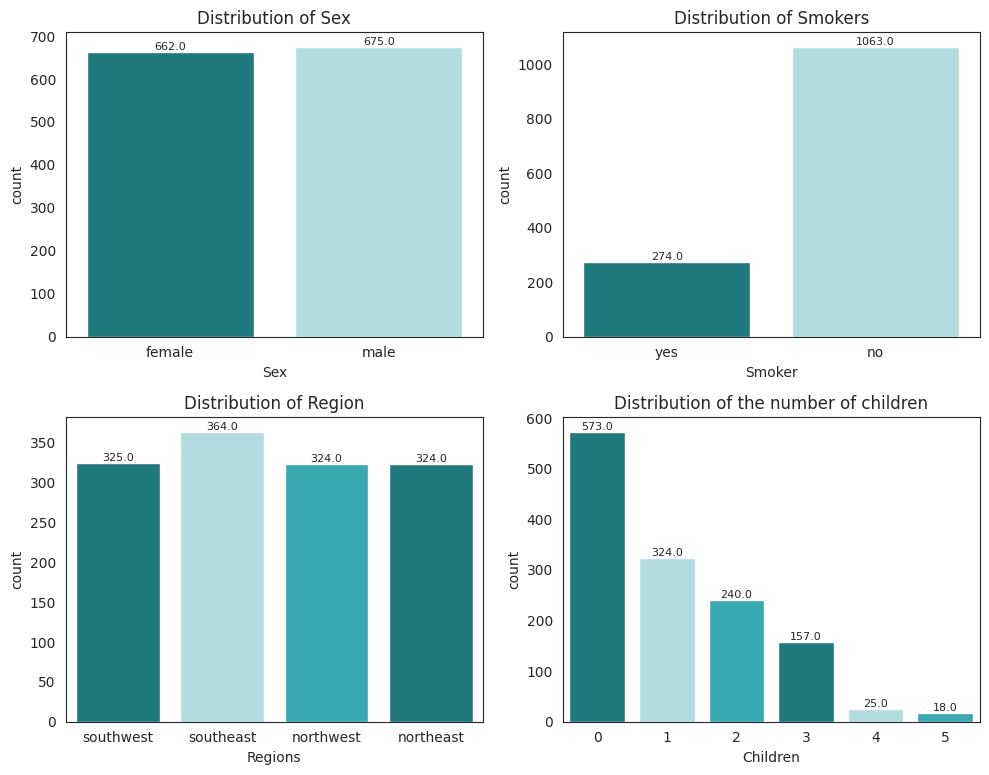

In [ ]:
'''
Univariate Analysis of Categorical Columns: Sex, Smokers, Region, Number of Children
'''
sns.set_palette(colors)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Countplot of Sex
sns.countplot(data=data_df, x='sex', ax=axes[0,0], palette = colors)
axes[0,0].set_title("Distribution of Sex")
axes[0,0].set_xlabel("Sex")

for p in axes[0, 0].patches:
    axes[0, 0].text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}',
                    ha='center', va='bottom', fontsize=8)

# Countplot of Smoker
sns.countplot(data=data_df, x='smoker', ax=axes[0,1], palette = colors)
axes[0,1].set_title("Distribution of Smokers")
axes[0,1].set_xlabel("Smoker")

for p in axes[0, 1].patches:
    axes[0, 1].text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}',
                    ha='center', va='bottom', fontsize=8)

# Countplot of Region
sns.countplot(data=data_df, x='region', ax=axes[1,0], palette = colors)
axes[1,0].set_title("Distribution of Region")
axes[1,0].set_xlabel("Regions")

for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}',
                    ha='center', va='bottom', fontsize=8)

# Countplot of Number of Children
sns.countplot(data=data_df, x='children', ax=axes[1,1], palette = colors)
axes[1,1].set_title("Distribution of the number of children")
axes[1,1].set_xlabel("Children")

for p in axes[1, 1].patches:
    axes[1, 1].text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}',
                    ha='center', va='bottom', fontsize=8)

plt.suptitle("")
plt.tight_layout()
plt.show()

**Observations:**

1. The visualization of the distribution of data based on gender clearly indicates an equal number of samples for both male and female observations
2. When visualizing the distribution of data based on the count of individuals who smoke, a clear imbalance in the number of smokers and non-smokers becomes apparent
3. An analysis of the distribution visualized by the "regions" column reveals a balanced representation of observations from the southwest, northwest, and northeast regions, with a slightly higher number of observations in the southeast
4. However, in the number of children column, the samples are heavily skewed. Many observations have no children, and the number of observations decreases as the number of children increases

### Categorical Features

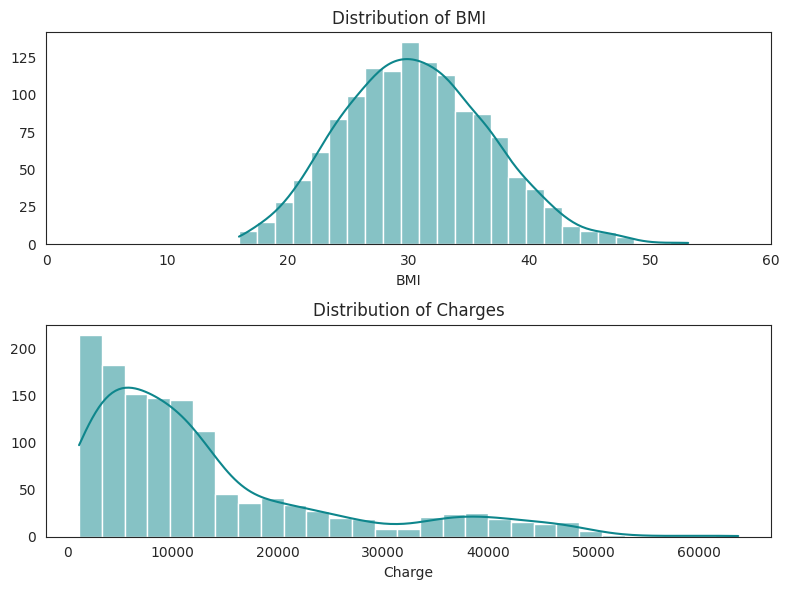

In [ ]:
'''
Univariate analysis of Numerical columns: BMI, Insurance Charges
'''
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Histogram of BMI
sns.histplot(data=data_df, x='bmi', kde=True, ax=axes[0], color='#0e868c')
axes[0].set_title("Distribution of BMI")
axes[0].set_xlabel("BMI")
axes[0].set_xlim(0,60)
axes[0].set_ylabel("")

# Histogram of Insurance Charges
sns.histplot(data=data_df, x='charges', kde=True, ax=axes[1], color='#0e868c')
axes[1].set_title("Distribution of Charges")
axes[1].set_xlabel("Charge")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Observations:**

1. Distribution of BMI is approximately ‘Normal’
2. This symmetrical distribution indicates that a substantial portion of individuals have BMI around the mean which is ~30
3. The charges histogram shows that majority of the insurance charges are clustered around the left tail, indicating that it is exhibits right-skewness
4. This implies that a significant proportion of the individuals incur lower insurance costs with fewer individuals incurring higher costs


## Multivariate Analysis

### Comparison of charges based on genders

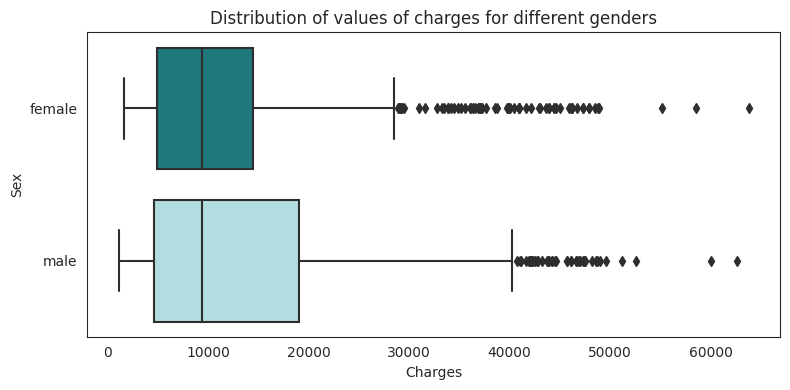

In [ ]:
'''
Plotting the distribution of insurance charges across different genders

'''

plt.figure(figsize=(8, 4))
sns.boxplot(data = data_df, y='sex', x='charges', palette = colors)
plt.xlabel("Charges")
plt.ylabel("Sex")
plt.title("Distribution of values of charges for different genders")
plt.tight_layout()
plt.show()

Although the average amount if charge is same for both genders, there is a significant difference in the 75th percentile and the maximum value between both the genders. We can say that 'Males tend to have higher amount of charges'


### Relationship between Region and Insurance Charges categorized by Sex

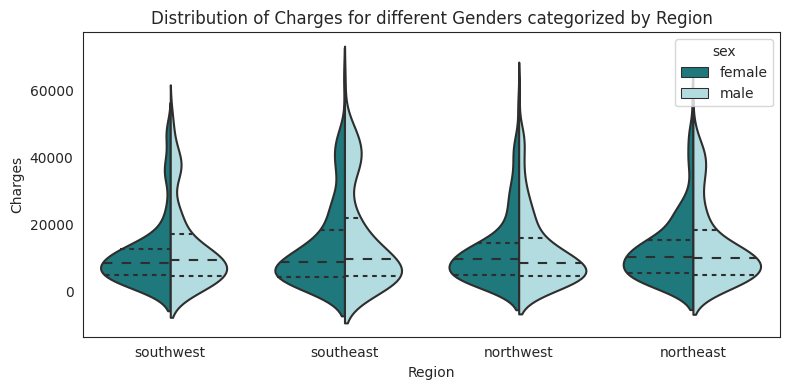

In [ ]:
'''
Plotting the distribution of insurance charges across regions and sex
'''
plt.figure(figsize=(8, 4))
sns.violinplot(data=data_df, x='region', y='charges', hue='sex', split=True, inner='quart', palette = colors)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Distribution of Charges for different Genders categorized by Region")
plt.tight_layout()
plt.show()

There is not any noticeable difference between the distribution of charges for different genders in different regions. As an extension of the first barplot's result, it is evident that in all regions, males tend to have higher charges compared to females.

### Is there any relationship between BMI, Insurance charges, and smoking?

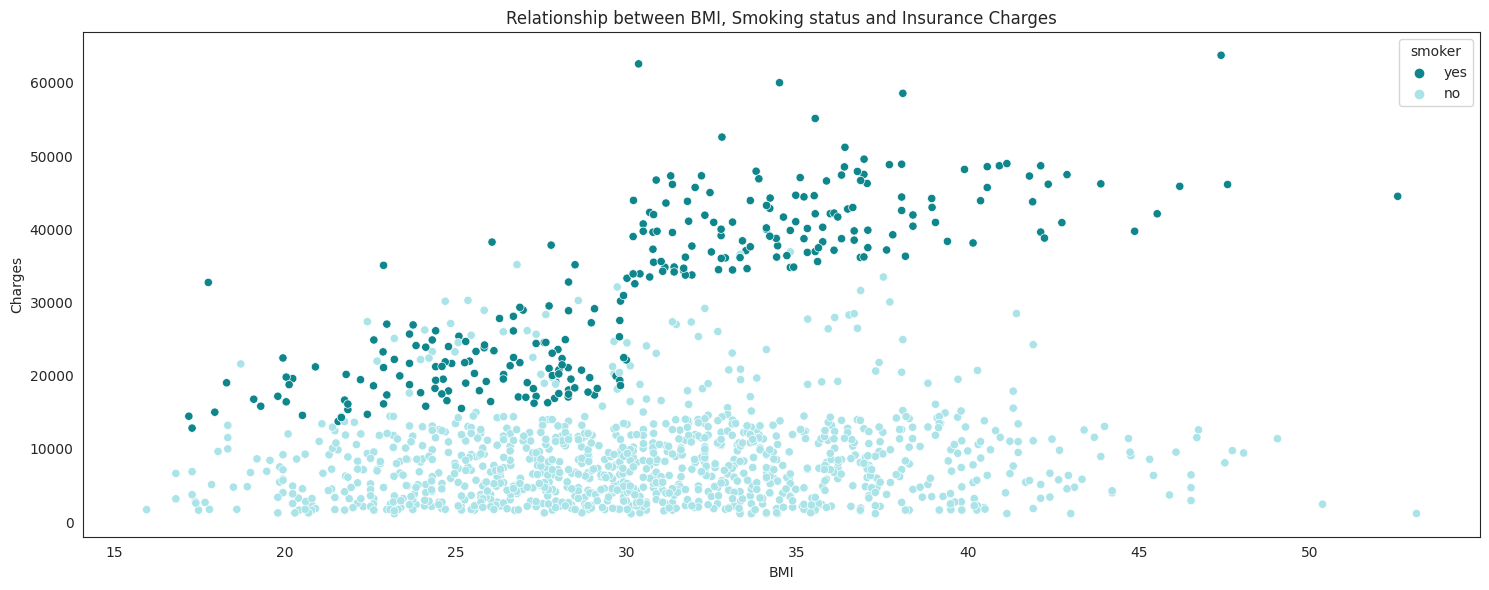

In [ ]:
'''
Plotting the distribution of insurance charges across smoker type, sex and BMI
'''

plt.figure(figsize=(15, 6))
sns.scatterplot(data = data_df, x='bmi', y='charges', hue='smoker', palette = colors)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Relationship between BMI, Smoking status and Insurance Charges")
plt.tight_layout()
plt.show()

One interesting find is that the non-smokers in general have lower charges even though their BMI is comparable to that of non-smokers.

Another find is the lack of any noticeable relationship between BMI and charges.

We can also find correlation value (as shown below) between them to confirm this.

In [ ]:
'''
Correlation Matrix between BMI and Insurance Charges
'''
corr_matrix = np.corrcoef(np.array(data_df['bmi']),
            np.array(data_df['charges']))

print(corr_matrix)

[[1.         0.19840083]
 [0.19840083 1.        ]]


The above correlation value is approximately 0.2 which is very low and we can confirm that both these numerical features, BMI and Insurance charges, are independent of each other.

# Hypothesis Testing

## Determining if the target variable - Insurance Charges, follow Central Limit Theorem

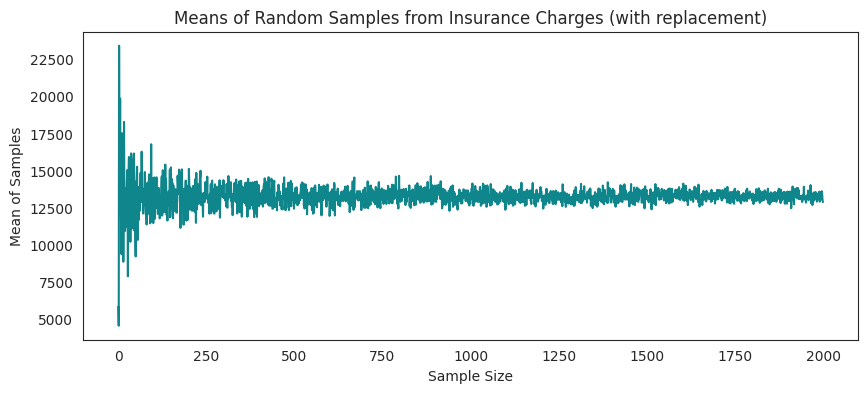

In [ ]:
'''
Checking if our insurance charges column aligns with the
central limit theorem to pick the type of hypothesis test
'''

plt.figure(figsize=(10, 4))

# Set the seed for reproducibility
np.random.seed(42)

# Create an array to store the means of the generated samples
mean_list = []

# Generate samples of varying sizes from 1 to 2000
for sample_size in range(1, 2000):
    sample = np.random.choice(data_df['charges'], size=sample_size, replace=True)
    mean_list.append(np.mean(sample))

# Plot the means against the sample sizes
plt.plot(range(1, 2000), mean_list)
plt.xlabel('Sample Size')
plt.ylabel('Mean of Samples')
plt.title('Means of Random Samples from Insurance Charges (with replacement)')
plt.show()


**Insights:**

* We can see from the above visual that, in the insurance charges column, as the sample size increases, the distribution of sample means approaches normality
* T-test is appropriate here as we are dealing with a sufficiently large sample size, and the sample mean aligns with the principles of the central limit theorem


## Performing hypothesis tests

Let's test some of the below hypotheses:

### **Hypothesis 1**: *The insurance charges for men are greater than those for women*

$H_0$ <- Charges of both men and women are equal

$H_a$ <- Charges of men is greater than women

In [ ]:
'''
Hypothesis 1 Test Preparation

H_0 <- Charges of both men and women are equal
H_a <- Charges of men is greater than women

'''

p_value = 0.05
male_charges = data_df[data_df['sex'] == 'male'].charges
female_charges = data_df[data_df['sex'] == 'female'].charges

print("Sample size of insurance charges for male:", len(male_charges))
print("Sample size of insurance charges for female:", len(female_charges))

print("Variance of insurance charges for male in the sample:", np.var(male_charges))
print("Variance of insurance charges for female in the sample:", np.var(female_charges))

print("Mean of insurance charges for male in the sample:", male_charges.mean())
print("Mean of insurance charges for female in the sample:", female_charges.mean())

max_var = max(np.var(male_charges), np.var(female_charges))
min_var = min(np.var(male_charges), np.var(female_charges))

var_ratio = max_var/min_var

print("Ratio of the variance:",var_ratio)

Sample size of insurance charges for male: 675
Sample size of insurance charges for female: 662
Variance of insurance charges for male in the sample: 168022420.12920284
Variance of insurance charges for female in the sample: 123660966.64456937
Mean of insurance charges for male in the sample: 13974.998863762965
Mean of insurance charges for female in the sample: 12569.578843835347
Ratio of the variance: 1.3587344874323901


Since the variance ratio is less than 4, we can assume the variances of the two samples are approximately equal and proceed with equal variance for the two sample t test.

In [ ]:
'''
Hypothesis 1 Testing: One tailed Two Sample T Test


H_0 <- Charges of both men and women are equal
H_a <- Charges of men is greater than women

'''
t,p = scipy.stats.ttest_ind(a=male_charges, b=female_charges, equal_var=True, alternative='greater')

print("t value:",t,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")

t value: 2.124391307062026 

p value: 0.01691039599755975 

Reject Null Hypothesis H0


**Result:**

From this we can conclude that the p-value is in the rejection region, we can reject the null hypothesis which states that the charges of men and women are same. We can also conclude by stating that our alternative hypothesis is true which states that charges for male is greater than female.


### **Hypothesis 2**: *The insurance charges differ for both smokers and non-smokers*

$H_0$ <- Charges for both smokers and non smokers are equal

$H_a$ <- Charges for both smokers and non smokers are not equal

In [ ]:
'''
Hypothesis 2 Test Preparation

H_0 <- Charges for both smokers and non smokers are equal
H_a <- Charges for both smokers and non smokers are not equal

'''

p_value = 0.05
smoker_charges = data_df[data_df['smoker'] == 'yes'].charges
non_smoker_charges = data_df[data_df['smoker'] == 'no'].charges

print("Sample size of insurance charges for smokers:", len(smoker_charges))
print("Sample size of insurance charges for non-smokers:", len(non_smoker_charges))

print("\nMean of insurance charges for smokers in the sample:", smoker_charges.mean())
print("Mean of insurance charges for non-smokers in the sample:", non_smoker_charges.mean())

print("\nVariance of insurance charges for smokers in the sample:", np.var(smoker_charges))
print("Variance of insurance charges for non-smokers in the sample:", np.var(non_smoker_charges))

max_var = max(np.var(smoker_charges), np.var(non_smoker_charges))
min_var = min(np.var(smoker_charges), np.var(non_smoker_charges))

var_ratio = max_var/min_var

print("\nRatio of the variance:",var_ratio)

Sample size of insurance charges for smokers: 274
Sample size of insurance charges for non-smokers: 1063

Mean of insurance charges for smokers in the sample: 32050.23183153284
Mean of insurance charges for non-smokers in the sample: 8440.660306508937

Variance of insurance charges for smokers in the sample: 132721153.13625307
Variance of insurance charges for non-smokers in the sample: 35881947.82391963

Ratio of the variance: 3.698827995278965


Since the variance ratio is less than 4, we can assume the variances of the two samples are approximately equal and proceed with equal variance for the two sample t test.

In [ ]:
'''
Hypothesis 2 Testing: Two tailed Two Sample T Test

H_0 <- Charges for both smokers and non smokers are equal
H_a <- Charges for both smokers and non smokers are not equal

'''

t,p = scipy.stats.ttest_ind(a=smoker_charges, b=non_smoker_charges, equal_var=True)

print("t value:",t,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")

t value: 46.64479459840305 

p value: 1.4067220949376498e-282 

Reject Null Hypothesis H0


**Results:**

From this we can conclude that the p-value is in rejection region, we can reject the null hypothesis which states that charges for smokers and non-smokers are same. We can also conclude by stating that our alternative hypothesis is true which states that charges for smokers and non-smokers are different.

### **Hypothesis 3**: *Insurance charges are equal for all regions*

$H_0$ <- Charges for all regions are equal

$H_a$ <- Charges for all regions are not equal

In [ ]:
'''
Hypothesis 3 Test Preparation

H_0 <- Charges for all regions are equal
H_a <- Charges for all regions are not equal

'''

p_value = 0.05
northeast_charges = data_df[data_df['region'] == 'northeast'].charges
southeast_charges = data_df[data_df['region'] == 'southeast'].charges
northwest_charges = data_df[data_df['region'] == 'northwest'].charges
southwest_charges = data_df[data_df['region'] == 'southwest'].charges

print("Sample size of insurance charges for northeast region:", len(northeast_charges))
print("Sample size of insurance charges for southeast region:", len(southeast_charges))
print("Sample size of insurance charges for northwest region:", len(northwest_charges))
print("Sample size of insurance charges for southwest region:", len(southwest_charges))

Sample size of insurance charges for northeast region: 324
Sample size of insurance charges for southeast region: 364
Sample size of insurance charges for northwest region: 324
Sample size of insurance charges for southwest region: 325


In [ ]:
s,p = scipy.stats.levene(northeast_charges,northwest_charges,southeast_charges,southwest_charges,center = 'median')
if p < p_value:
  print("Not Equal Variance")
else:
  print(" Equal Variance")


Not Equal Variance
5.5534798606999125 
 0.0008689544824002284


Even though the levene's test fails, we can consider the variance of the samples as equal. This is because the sample size of each group is large and almost equal.

In [ ]:
'''
Hypothesis 3 Testing: ANOVA test

H_0 <- Charges for all regions are equal
H_a <- Charges for all regions are not equal

'''

f,p = scipy.stats.f_oneway(northeast_charges,northwest_charges,southeast_charges,southwest_charges)


print("f value:",f,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")

f value: 2.926139903662777 

p value: 0.03276288025444947 

Reject Null Hypothesis H0


**Results:**

From this, we can conclude that the p-value is in the rejection region and the null hypothesis which states insurance charges in all the 4 regions are the same and should be rejected. From our Anova test, we can conclude that our Alternative Hypothesis is true and we can state that regions play a role in charges and they are not equal for all regions.

### **Hypothesis 4**: *Insurance charges are equal for all regions*

$H_0$ <- Proportion of smokers in male and female are same

$H_a$ <- Proportion of smokers in male and female are not same

In [ ]:
'''
Hypothesis 4 Testing: Chi-square test

H_0 <- Proportion of smokers in male and female are same
H_a <- Proportion of smokers in male and female are not same

'''

p_value = 0.05

table = pd.crosstab(data_df['sex'],data_df['smoker'])

chi_sq, p, dof, e_f =  scipy.stats.chi2_contingency(table)

print("chi_sq coeeficient value:",chi_sq,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")

chi_sq coeeficient value: 7.469139330086637 

p value: 0.0062765550120107375 

Reject Null Hypothesis H0


Results:

From this, we can conclude that the p-value is in the rejection region and the null hypothesis which states the proportion of smokers in males and females are the same should be rejected. From our Chi-Squared test, we can conclude that our Alternative Hypothesis is true and we can state that the proportion of smokers in male and female are not the same.

# Hypothesis Testing - Data Transformations and Tests

We know the data is not normal, but the sample means are. Let's try some transformations to see if we can bring the data to near normal and perform the tests.

In [ ]:
#Applying transformations
data_df['charges_sqrt'] = np.sqrt(data_df['charges'])
data_df['charges_boxcox'], _ = boxcox(data_df['charges'])

Let's plot the data before and after the transformations

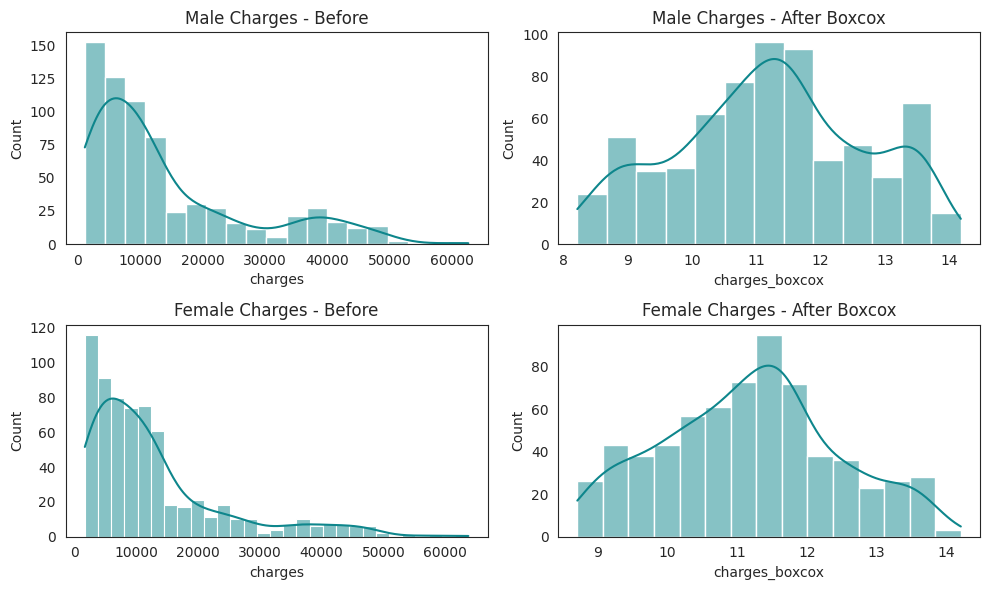

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(data=data_df[data_df['sex'] == 'male'], x='charges', kde=True, color='#0e868c', ax=axes[0, 0])
axes[0, 0].set_title('Male Charges - Before')

sns.histplot(data=data_df[data_df['sex'] == 'male'], x='charges_boxcox', kde=True, color='#0e868c', ax=axes[0, 1])
axes[0, 1].set_title('Male Charges - After Boxcox')

sns.histplot(data=data_df[data_df['sex'] == 'female'], x='charges', kde=True, color='#0e868c', ax=axes[1, 0])
axes[1, 0].set_title('Female Charges - Before')

sns.histplot(data=data_df[data_df['sex'] == 'female'], x='charges_boxcox', kde=True, color='#0e868c', ax=axes[1, 1])
axes[1, 1].set_title('Female Charges - After Boxcox')

plt.tight_layout()
plt.show()

We can see that the boxcox transformations has made the data to be almost normal. Now, let's perform the tests.

In [ ]:
'''
Hypothesis 1 Testing: One tailed Two Sample T Test

H_0 <- Charges of both men and women are equal
H_a <- Charges of men is greater than women

'''
print("Hypothesis Test Results with Boxcox Transformation on Insurance Charges")
p_value = 0.05
male_charges = data_df[data_df['sex'] == 'male'].charges_boxcox
female_charges = data_df[data_df['sex'] == 'female'].charges_boxcox

print("Sample size of insurance charges for male:", len(male_charges))
print("Sample size of insurance charges for female:", len(female_charges))

print("Variance of insurance charges for male in the sample:", np.var(male_charges))
print("Variance of insurance charges for female in the sample:", np.var(female_charges))

print("Mean of insurance charges for male in the sample:", male_charges.mean())
print("Mean of insurance charges for female in the sample:", female_charges.mean())

max_var = max(np.var(male_charges), np.var(female_charges))
min_var = min(np.var(male_charges), np.var(female_charges))

var_ratio = max_var/min_var

print("Ratio of the variance:",var_ratio)

'''
Checking the variance of the samples
'''

s,p = scipy.stats.levene(male_charges,female_charges)
if p < p_value:
  print("Equal Variance")
else:
  print("Not Equal Variance")

'''
Performing the tests
'''

t,p = scipy.stats.ttest_ind(a=male_charges, b=female_charges, equal_var=True, alternative='greater')

print("t value:",t,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")

Hypothesis Test Results with Boxcox Transformation on Insurance Charges
Sample size of insurance charges for male: 675
Sample size of insurance charges for female: 662
Variance of insurance charges for male in the sample: 2.1333678434368335
Variance of insurance charges for female in the sample: 1.5782235351987297
Mean of insurance charges for male in the sample: 11.20588614570256
Mean of insurance charges for female in the sample: 11.178524970283043
Ratio of the variance: 1.3517526483776585
Equal Variance
t value: 0.36664368222871624 

p value: 0.3569714606248009 

Null Hypothesis H0 cannot be rejected


This test shows that we can't reject the Null hypothesis and indicates that Charges of both men and women are equal, which is contradictory to our previous result for the same hypothesis.

Let's try the same for the next hypothesis

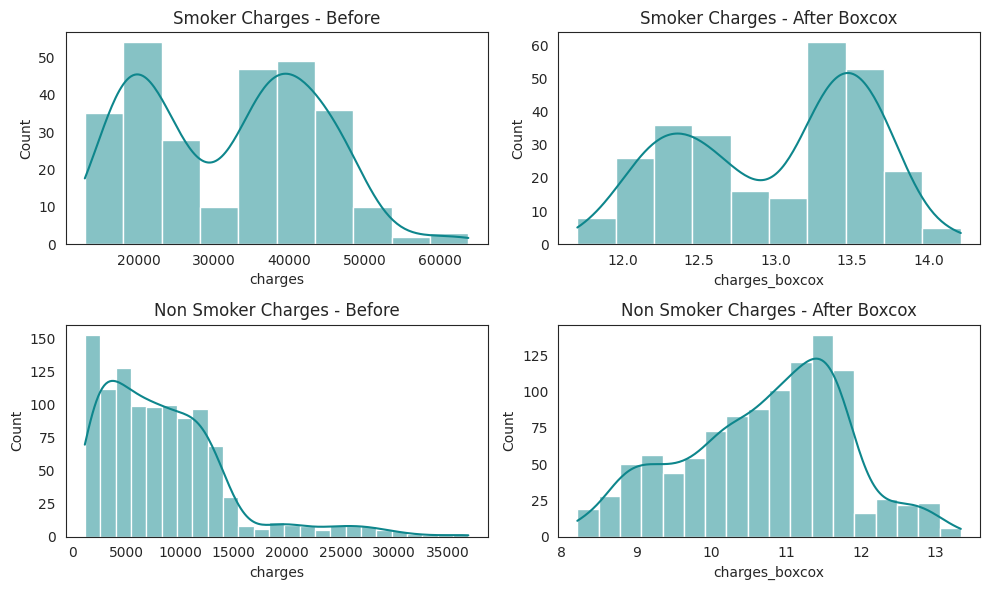

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(data=data_df[data_df['smoker'] == 'yes'], x='charges', kde=True, color='#0e868c', ax=axes[0, 0])
axes[0, 0].set_title('Smoker Charges - Before')

sns.histplot(data=data_df[data_df['smoker'] == 'yes'], x='charges_boxcox', kde=True, color='#0e868c', ax=axes[0, 1])
axes[0, 1].set_title('Smoker Charges - After Boxcox')

sns.histplot(data=data_df[data_df['smoker'] == 'no'], x='charges', kde=True, color='#0e868c', ax=axes[1, 0])
axes[1, 0].set_title('Non Smoker Charges - Before')

sns.histplot(data=data_df[data_df['smoker'] == 'no'], x='charges_boxcox', kde=True, color='#0e868c', ax=axes[1, 1])
axes[1, 1].set_title('Non Smoker Charges - After Boxcox')

plt.tight_layout()
plt.show()

From the above plot we can see that the transformation didn't bring much change to the distribution of the data. But let's check how the test results are

In [ ]:
'''
Hypothesis 2 Testing: Two tailed Two Sample T Test

H_0 <- Charges for both smokers and non smokers are equal
H_a <- Charges for both smokers and non smokers are not equal

'''

p_value = 0.05
smoker_charges = data_df[data_df['smoker'] == 'yes'].charges_boxcox
non_smoker_charges = data_df[data_df['smoker'] == 'no'].charges_boxcox

print("Sample size of insurance charges for smokers:", len(smoker_charges))
print("Sample size of insurance charges for non-smokers:", len(non_smoker_charges))

print("\nMean of insurance charges for smokers in the sample:", smoker_charges.mean())
print("Mean of insurance charges for non-smokers in the sample:", non_smoker_charges.mean())

print("\nVariance of insurance charges for smokers in the sample:", np.var(smoker_charges))
print("Variance of insurance charges for non-smokers in the sample:", np.var(non_smoker_charges))

max_var = max(np.var(smoker_charges), np.var(non_smoker_charges))
min_var = min(np.var(smoker_charges), np.var(non_smoker_charges))

var_ratio = max_var/min_var

print("\nRatio of the variance:",var_ratio)

'''
Checking the variance of the samples
'''

s,p = scipy.stats.levene(smoker_charges,non_smoker_charges)
if p < p_value:
  print("Equal Variance")
else:
  print("Not Equal Variance")


'''
Performing the tests
'''

t,p = scipy.stats.ttest_ind(a=smoker_charges, b=non_smoker_charges, equal_var=True)

print("t value:",t,'\n')
print("p value:",p,'\n')

if p < p_value:
  print("Reject Null Hypothesis H0")
else:
  print("Null Hypothesis H0 cannot be rejected")


Sample size of insurance charges for smokers: 274
Sample size of insurance charges for non-smokers: 1063

Mean of insurance charges for smokers in the sample: 13.007154652299583
Mean of insurance charges for non-smokers in the sample: 10.724549674455803

Variance of insurance charges for smokers in the sample: 0.3650847641833798
Variance of insurance charges for non-smokers in the sample: 1.1758955862899336

Ratio of the variance: 3.220883755366161
Equal Variance
t value: 33.50264323365201 

p value: 4.186093242380766e-179 

Reject Null Hypothesis H0


The above result aligns with what we have from our previous test for the same hypothesis.